# Import

In [2]:
import os
import fnmatch
import itertools
import time
import numpy as np
import pandas as pd

### Libraries for plotting 
import matplotlib.pyplot as plt
%matplotlib inline

### Libraries for processing images
from skimage import io,data,color,exposure,transform
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import rescale, resize, downscale_local_mean

# Load Image

### Basic Configuration

In [3]:
image_folder = "waste\\"
pic_count = 2527
x_shape = 128
y_shape = 128
waste_name = ['glass', 'metal', 'paper', 'trash', 'plastic', 'cardboard']
class_num = len(waste_name)

### Load an example image

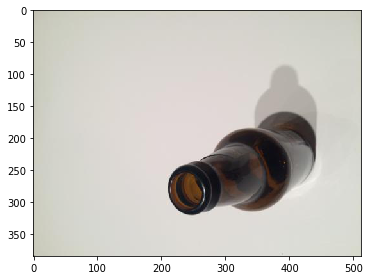

In [23]:
example=image_folder+"glass\\glass1.jpg"
sk_image=io.imread(example)
io.imshow(sk_image)

### Image Processing

In [21]:
from image_processing_lib import pic_normalization,pic_preprocess,batch_process

## Try the image processing

Text(0.5,1,'Normalized')

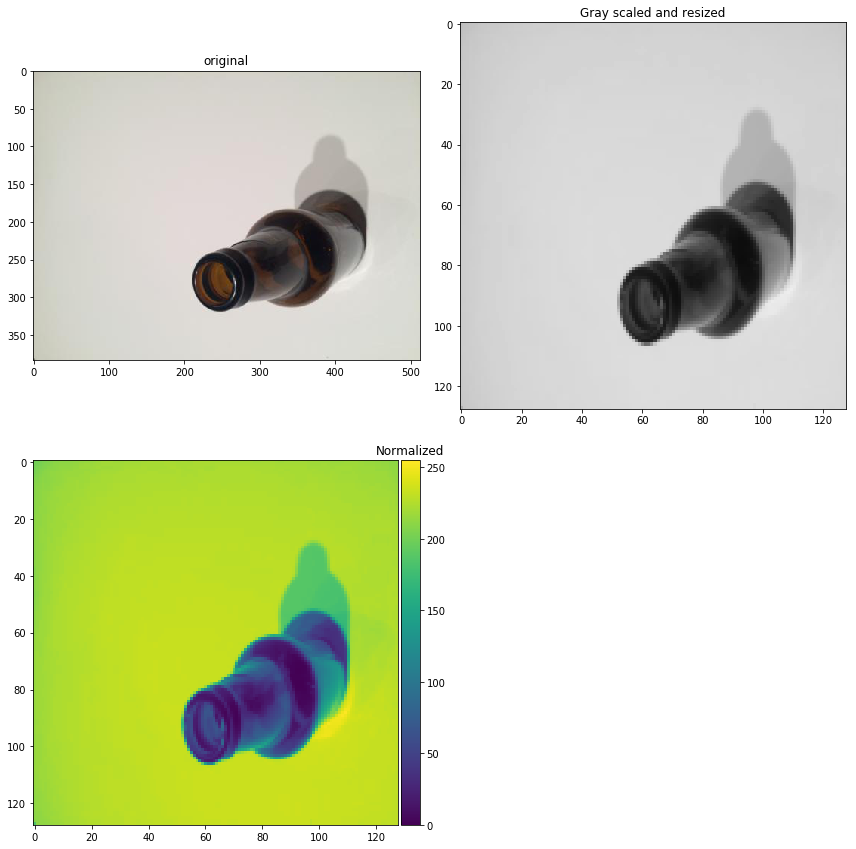

In [24]:
sk_image = io.imread(example)
plt.figure("hist",figsize=(12,12))
plt.subplot(221)
io.imshow(sk_image)
plt.title('original')
plt.subplot(222)
sk_image2 = pic_preprocess(example)
io.imshow(sk_image2)
plt.title('Gray scaled and resized')
plt.subplot(223)
sk_image3 = pic_normalization(sk_image2)
io.imshow(sk_image3)
plt.title('Normalized')

## Batch Processing

In [18]:
%%time
data_x = []
data_y = []
print('Image folders are:')
for i in range(len(waste_name)):
    pic_folder=image_folder+waste_name[i]+'\\'
    coll = fnmatch.filter(os.listdir(pic_folder), '*.*g')
    print(pic_folder,'Number of images:',len(os.listdir(pic_folder)))
    t = 0
    for j in range(len(coll)):
        img = batch_process(pic_folder+coll[j])
        data_x.append(img)
        data_y.append(i)
data_X = np.array(data_x)
data_Y = np.array(data_y)
print('The shape of feature set (set of image arrays) is: ',data_X.shape)
print('The shape of label is: ',data_Y.shape)

Image folders are:
waste\glass\ Number of images: 501
waste\metal\ Number of images: 410
waste\paper\ Number of images: 594
waste\trash\ Number of images: 137
waste\plastic\ Number of images: 482
waste\cardboard\ Number of images: 403
The shape of feature set (set of image arrays) is:  (2527, 16384)
The shape of label is:  (2527,)
Wall time: 44 s


## Save Data to binary file

In [19]:
np.savez("data",data_X=data_X,data_Y=data_Y)